In [1]:
import numpy as np
import h5py
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import os

import sklearn.preprocessing as prep
import tensorflow as tf

from LstmVAE import LSTM_Var_Autoencoder
from LstmVAE import preprocess

name = '/home/mabbasloo/Documents/carData4/data/lbo/'
name1 = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/data/'

In [2]:
filename = '/home/mabbasloo/Desktop/Variational-Lstm-Autoencoder/list'
st = 6
stride = 10
with open(filename) as f:
    data = f.readlines() 
data = [x.strip() for x in data]   
data = sorted(data, key=lambda x:x[0:4])[0::stride]
print (len(data), np.int(len(data)/st))
for i in range(2*st):
    print (data[i])
#print (data[len(data)-1])
#for i in range(len(data)):
#    print (data[i])

1230 205
f001_S2000001_1.mat
f001_S2000001_11.mat
f001_S2000001_21.mat
f001_S2000001_31.mat
f001_S2000001_41.mat
f001_S2000001_51.mat
f002_S2000001_1.mat
f002_S2000001_11.mat
f002_S2000001_21.mat
f002_S2000001_31.mat
f002_S2000001_41.mat
f002_S2000001_51.mat


In [3]:
DATA = []
d = 30
#hm = 20*st
hm = len(data)
dimm = 1714
db = h5py.File(name + data[0], 'r')
ds = db['Phi']
ds = np.asarray(ds).astype(np.float32).T
ds = ds[:, 0:d]
ds[np.isnan(ds)] = 0.0
ds[np.isinf(ds)] = 0.0
for i in range(hm):
    #db = h5py.File(name + data[i], 'r')
    #ds = db['Phi']
    #ds = np.asarray(ds).astype(np.float32).T
    #ds = ds[:, 500-d:]
    #print (ds.shape)
    db1 = h5py.File(name1 + data[i], 'r')
    ds1 = db1['shape_xyz']
    ds1 = np.asarray(ds1).astype(np.float32)
    ds1[np.isnan(ds1)] = 0.0
    ds1[np.isinf(ds1)] = 0.0  
    ds1[0] = ds1[0]/np.linalg.norm(ds1[0])
    ds1[1] = ds1[1]/np.linalg.norm(ds1[1])
    ds1[2] = ds1[2]/np.linalg.norm(ds1[2])   
    if ds1.shape[1] == dimm: # f256_S2000001_6.mat has different dimension so f256_S2000001* are removed.
        DATA.append(np.dot(ds1, ds))
    else:
        print (data[i])     

#lx = np.linalg.norm(DATA[:][0][:])
#ly = np.linalg.norm(DATA[:][1][:])
#lz = np.linalg.norm(DATA[:][2][:])
#for i in range(hm):
#    DATA[i][0] = DATA[i][0]/lx
#    DATA[i][1] = DATA[i][1]/ly
#    DATA[i][2] = DATA[i][2]/lz 
    
def standard_scale(X_train):
    for i in range(len(X_train)):
        X_train[i] = X_train[i]/np.linalg.norm(X_train[i], 'fro')
    return X_train

DATA = standard_scale(DATA)

dim = np.int(len(data)/st)

print (len(DATA), DATA[0].shape, dim)

1230 (3, 30) 205


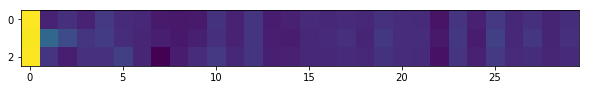

In [4]:
plt.figure(figsize=(10, 10)); plt.imshow(DATA[0])

Text(0.5, 0, 'z')

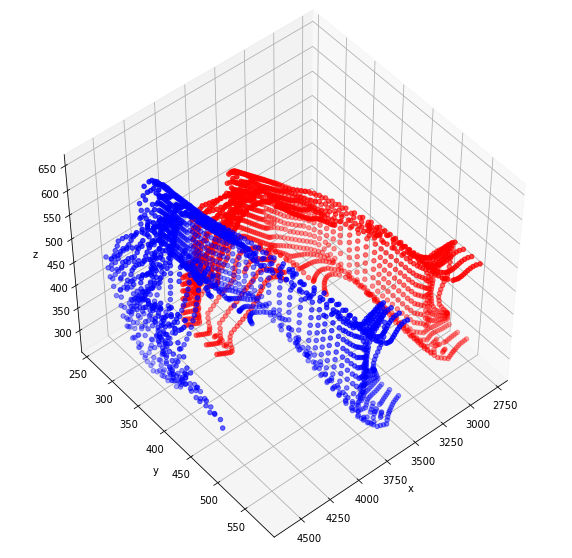

In [5]:
db1 = h5py.File(name1 + data[0], 'r')
ds1 = db1['shape_xyz']
ds1 = np.asarray(ds1).astype(np.float32)
db2 = h5py.File(name1 + data[5], 'r')
ds2 = db2['shape_xyz']
ds2 = np.asarray(ds2).astype(np.float32)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ds1[0], ds1[1], ds1[2], c='r', marker='o')
ax.scatter(ds2[0], ds2[1], ds2[2], c='b', marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

(3, 1714)


Text(0.5, 0, 'z')

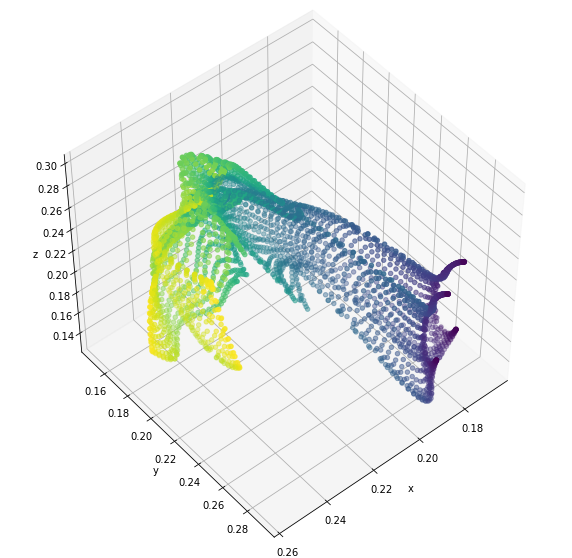

In [6]:
xyz1 = np.dot(DATA[0], np.linalg.pinv(ds))
xyz2 = np.dot(DATA[5], np.linalg.pinv(ds))
print (xyz1.shape)
cl1 = np.linalg.norm(np.abs(xyz1 - ds1), axis=0)
cl1 = (cl1-np.amin(cl1))/(np.amax(cl1)-np.amin(cl1))
cl2 = np.linalg.norm(np.abs(xyz2 - ds2), axis=0)
cl2 = (cl2-np.amin(cl2))/(np.amax(cl2)-np.amin(cl2))
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz1[0], xyz1[1], xyz1[2], c=cl1, marker='o')
ax.scatter(xyz2[0], xyz2[1], xyz2[2], c=cl2, marker='o')
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

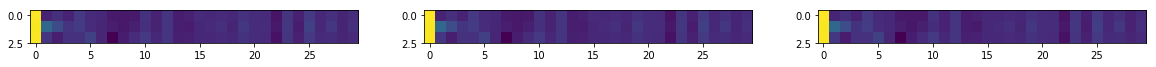

In [7]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(DATA[dim-1])
plt.subplot(1,3,2); plt.imshow(DATA[dim])
plt.subplot(1,3,3); plt.imshow(DATA[dim+1])

------------------------------part embedding------------------------------

In [10]:
dim2 = 100
vae = LSTM_Var_Autoencoder(intermediate_dim = 100, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae.fit(DATA[0:dim2*st], learning_rate=0.001, batch_size = 100, num_epochs = 200, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.01130
Epoch   11   Loss 0.00354
Epoch   21   Loss 0.00190
Epoch   31   Loss 0.00096
Epoch   41   Loss 0.00051
Epoch   51   Loss 0.00019
Epoch   61   Loss 0.00007
Epoch   71   Loss 0.00003
Epoch   81   Loss 0.00002
Epoch   91   Loss 0.00002
Epoch  101   Loss 0.00002
Epoch  111   Loss 0.00002
Epoch  121   Loss 0.00002
Epoch  131   Loss 0.00001
Epoch  141   Loss 0.00001
Epoch  151   Loss 0.00001
Epoch  161   Loss 0.00001
Epoch  171   Loss 0.00001
Epoch  181   Loss 0.00001
Epoch  191   Loss 0.00001


Training time 0.33 minutes


In [19]:
x_reconstructed, recons_error = vae.reconstruct(DATA[dim2*st:], get_error = True) #returns squared error

x_reduced = vae.reduce(DATA) #latent space representation

Text(0.5, 0, 'latent 3')

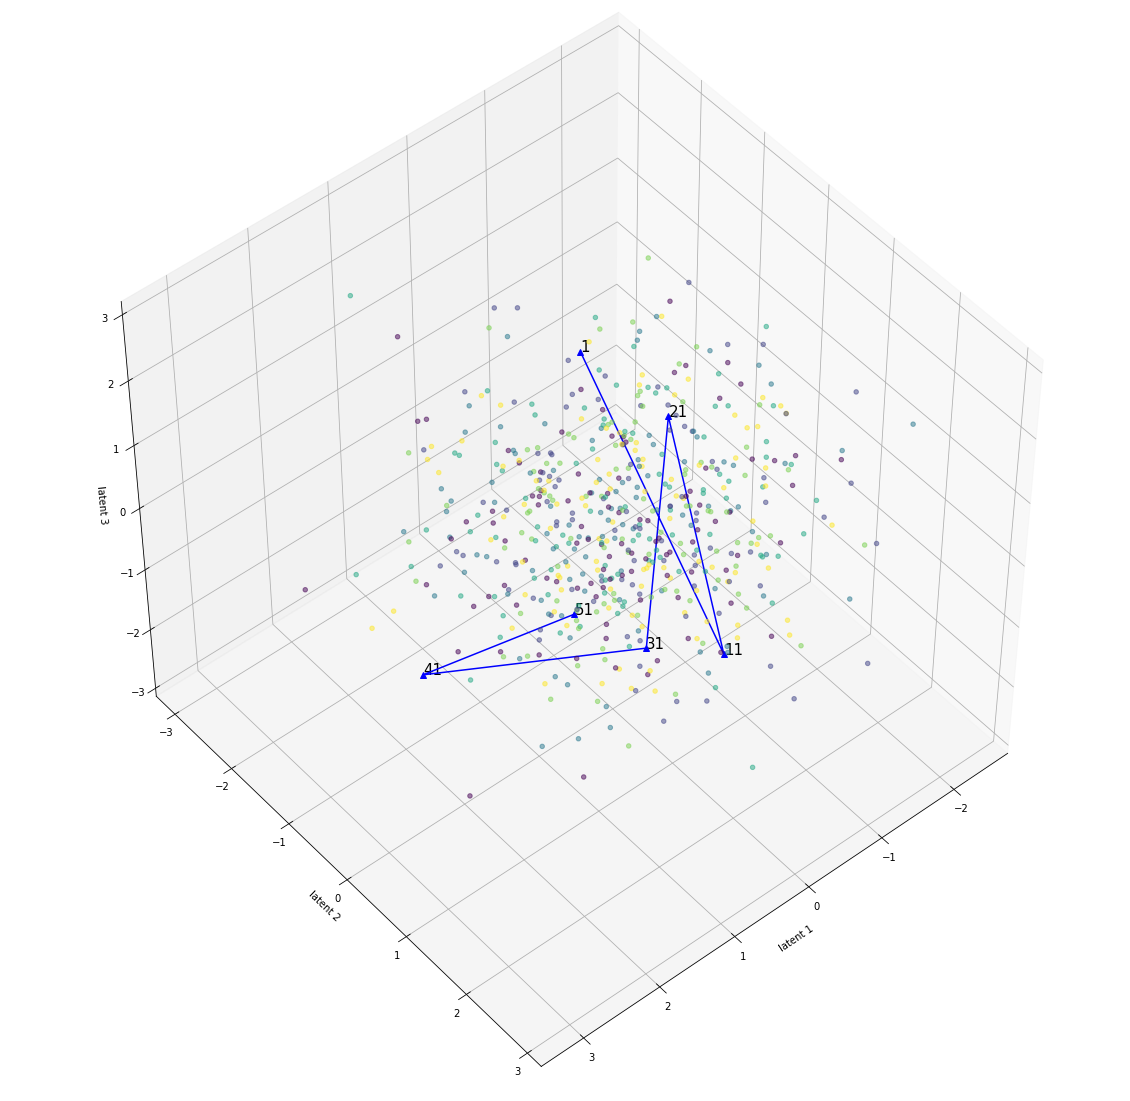

In [20]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']
label = []
for i in range(0, st):
    label.append(np.str(i*stride+1))
cl = np.zeros((dim2*st))    
for i in range(dim2):
    for j in range(st):
        cl[i*st + j] = j*(255.0/st)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced[0:dim2*st, 0], x_reduced[0:dim2*st, 1], x_reduced[0:dim2*st, 2], c=cl, marker=m[0], alpha=0.5)
ax.plot(x_reduced[dim2*st:(dim2+1)*st, 0], x_reduced[dim2*st:(dim2+1)*st, 1], x_reduced[dim2*st:(dim2+1)*st, 2], c=c[1], marker=m[1])
ii = 0
for i in range(dim2*st, (dim2+1)*st):
    ax.text(x_reduced[i, 0], x_reduced[i, 1], x_reduced[i, 2], label[ii], size=15, zorder=1, color='k') 
    ii += 1
ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

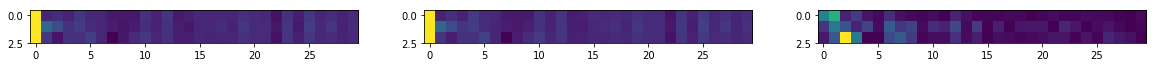

In [13]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed[0])
plt.subplot(1,3,2); plt.imshow(DATA[dim2*st])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed[0] - DATA[dim2*st]))

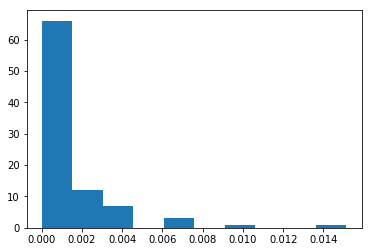

In [14]:
_,_,_ = plt.hist(np.abs(x_reconstructed[0] - DATA[dim2*st]).reshape((3*d)), bins=10)

(3, 1714)
(3, 1714)


Text(0.5, 0, 'z')

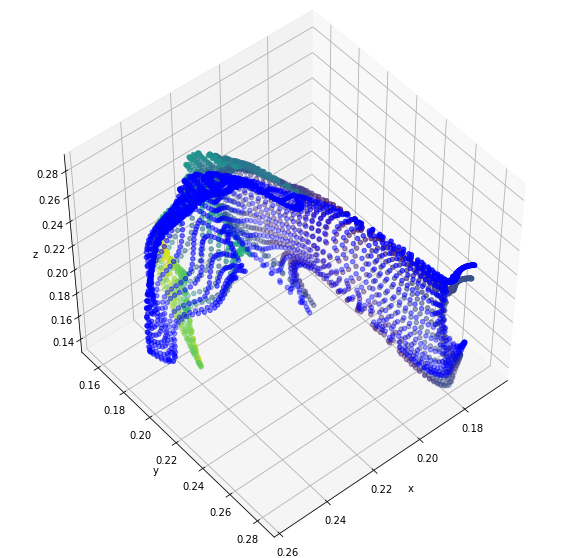

In [15]:
xyz = np.dot(DATA[dim2*st], np.linalg.pinv(ds))
xyz_reconstructed = np.dot(x_reconstructed[0], np.linalg.pinv(ds))
cl = np.linalg.norm(np.abs(xyz - xyz_reconstructed), axis=0)
cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
print (xyz_reconstructed.shape)
print (xyz.shape)
fig = plt.figure(figsize=(10, 10))
c = ['b', 'r']
m = ['o', 'o']
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xyz[0], xyz[1], xyz[2], c=c[0], marker=m[0])
ax.scatter(xyz_reconstructed[0], xyz_reconstructed[1], xyz_reconstructed[2], c=cl, marker=m[1])
ax.view_init(50, 50)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

In [16]:
DATA3 = []
for i in range(dim):
    D = np.asarray(DATA[i*st:(i+1)*st]).reshape(st*3, d)
    DATA3.append(D)
print (len(DATA3), DATA3[0].shape)  
ddd = st*3
print (ddd, d)
dim3 = 100

205 (18, 30)
18 30


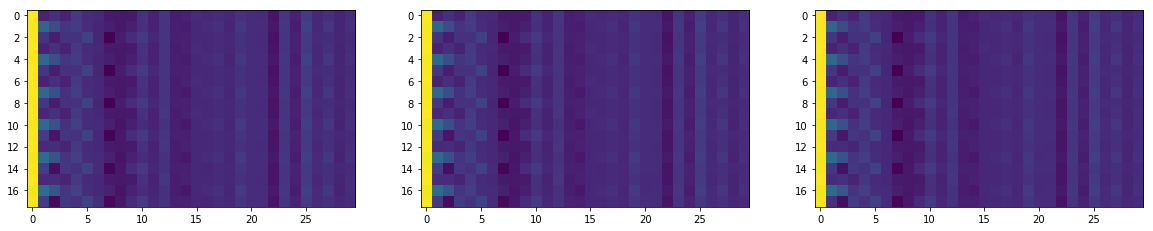

In [17]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(DATA3[dim3-1])
plt.subplot(1,3,2); plt.imshow(DATA3[dim3])
plt.subplot(1,3,3); plt.imshow(DATA3[dim3+1])

------------------------------sequence embedding------------------------------

In [18]:
vae3 = LSTM_Var_Autoencoder(intermediate_dim = 400, z_dim = 3, n_dim=d, stateful = True) #default stateful = False

vae3.fit(DATA3[0:dim3], learning_rate=0.001, batch_size = 10, num_epochs = 200, opt = tf.train.AdamOptimizer, REG_LAMBDA = 0.01, grad_clip_norm=10, optimizer_params=None, verbose = True)



Training...


Epoch   1    Loss 0.00974
Epoch   11   Loss 0.00092
Epoch   21   Loss 0.00064
Epoch   31   Loss 0.00049
Epoch   41   Loss 0.00040
Epoch   51   Loss 0.00034
Epoch   61   Loss 0.00030
Epoch   71   Loss 0.00028
Epoch   81   Loss 0.00026
Epoch   91   Loss 0.00021
Epoch  101   Loss 0.00004
Epoch  111   Loss 0.00001
Epoch  121   Loss 0.00000
Epoch  131   Loss 0.00000
Epoch  141   Loss 0.00000
Epoch  151   Loss 0.00000
Epoch  161   Loss 0.00000
Epoch  171   Loss 0.00000
Epoch  181   Loss 0.00000
Epoch  191   Loss 0.00000


Training time 3.14 minutes


In [21]:
x_reconstructed3, recons_error3 = vae3.reconstruct(DATA3[dim3:], get_error = True) #returns squared error

x_reduced3 = vae3.reduce(DATA3) #latent space representation

Text(0.5, 0, 'latent 3')

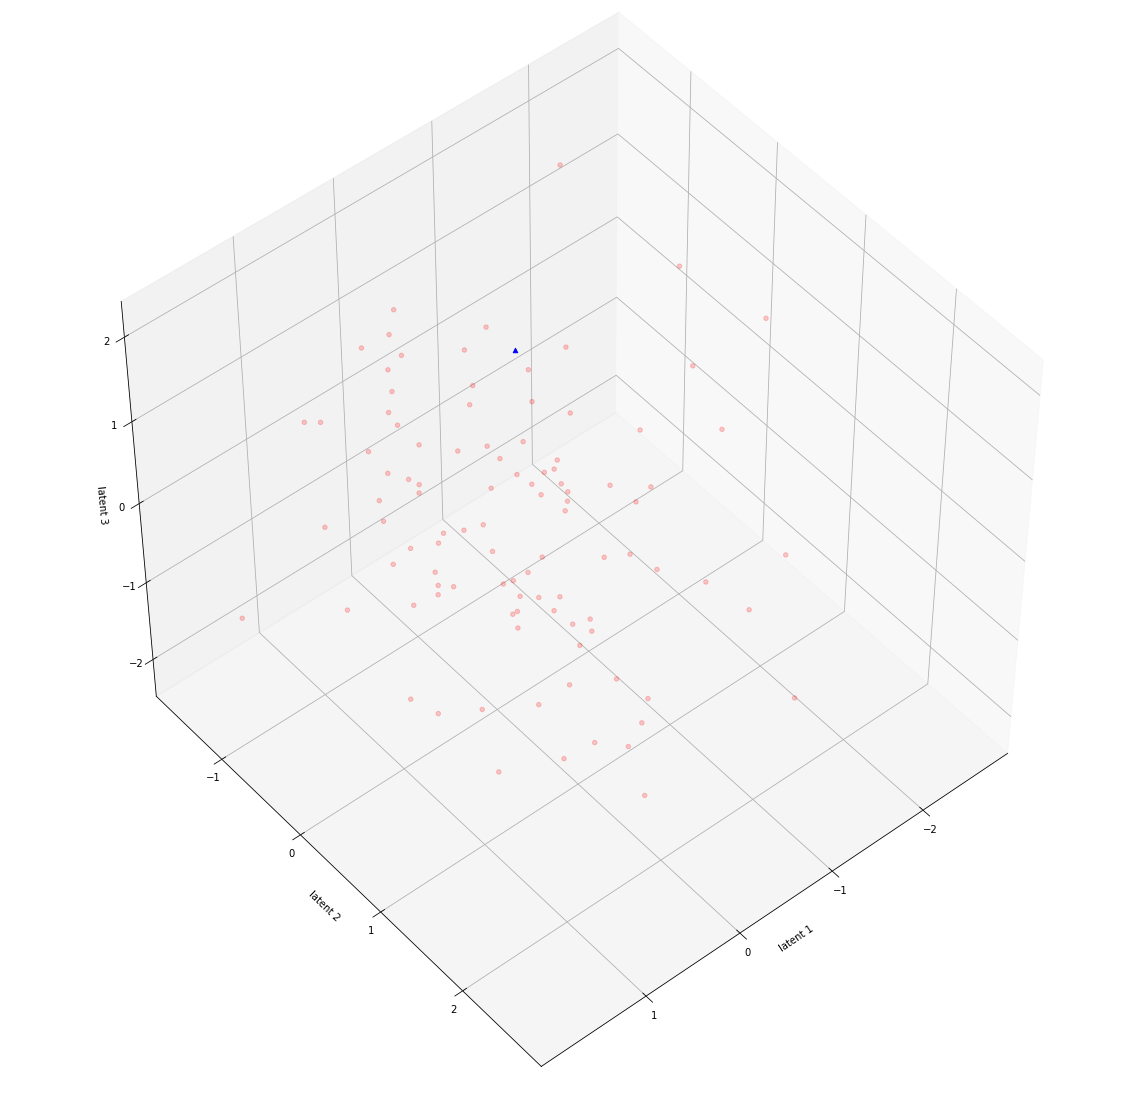

In [22]:
fig = plt.figure(figsize=(20, 20))
c = ['r', 'b']
m = ['o', '^']

ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_reduced3[0:dim3, 0], x_reduced3[0:dim3, 1], x_reduced3[0:dim3, 2], c=c[0], marker=m[0], alpha=0.2)
ax.scatter(x_reduced3[dim3:dim3+1, 0], x_reduced3[dim3:dim3+1, 1], x_reduced3[dim3:dim3+1, 2], c=c[1], marker=m[1])

ax.view_init(50, 50)
ax.set_xlabel('latent 1')
ax.set_ylabel('latent 2')
ax.set_zlabel('latent 3')

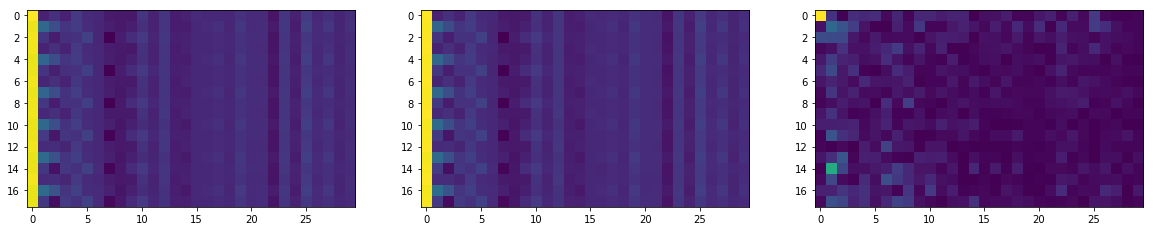

In [23]:
plt.figure(figsize=(20, 60)); 
plt.subplot(1,3,1); plt.imshow(x_reconstructed3[0])
plt.subplot(1,3,2); plt.imshow(DATA3[dim3])
plt.subplot(1,3,3); plt.imshow(np.abs(x_reconstructed3[0] - DATA3[dim3]))

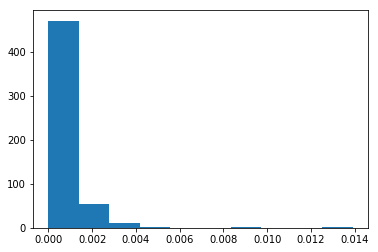

In [24]:
_,_,_ = plt.hist(np.abs(x_reconstructed3[0] - DATA3[dim3]).reshape((d*ddd)), bins=10)

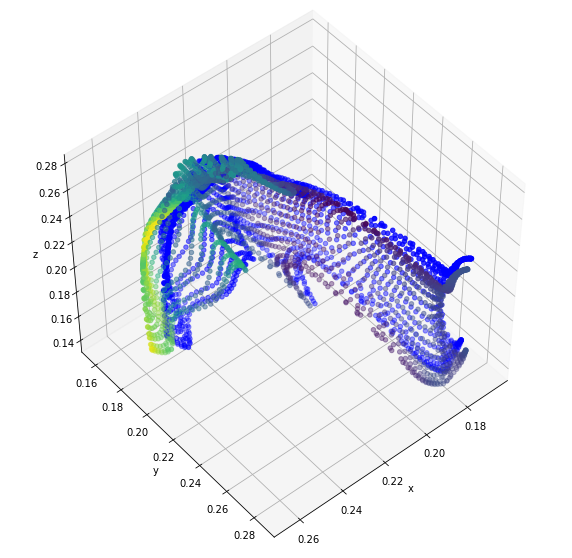

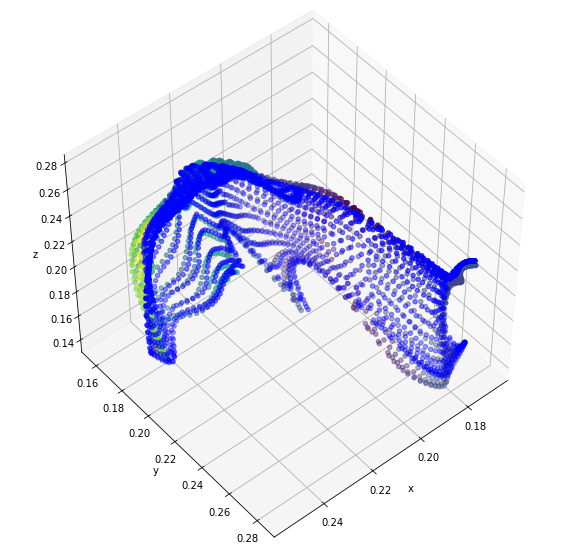

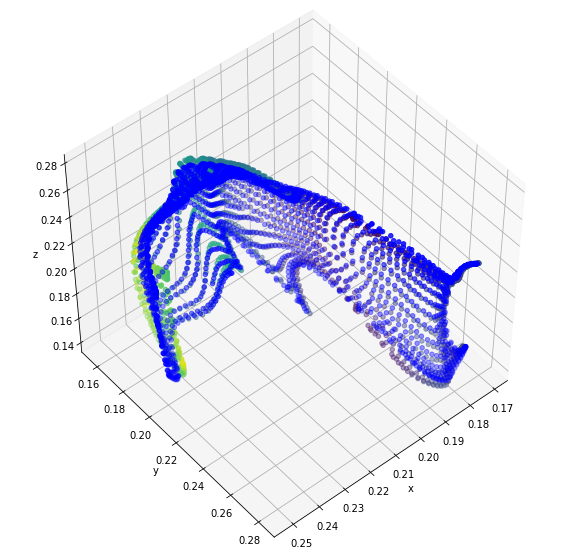

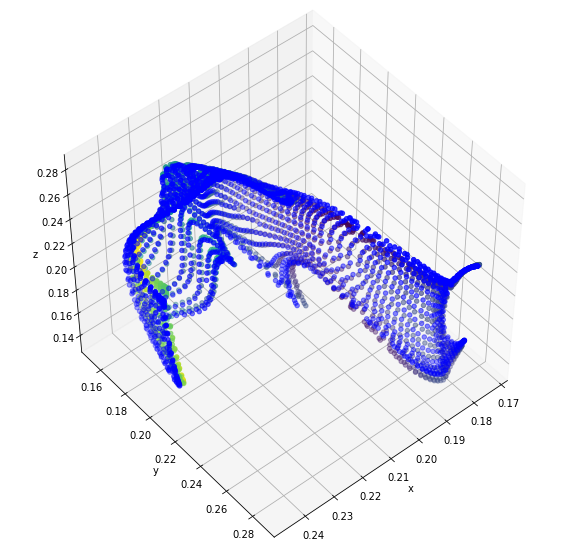

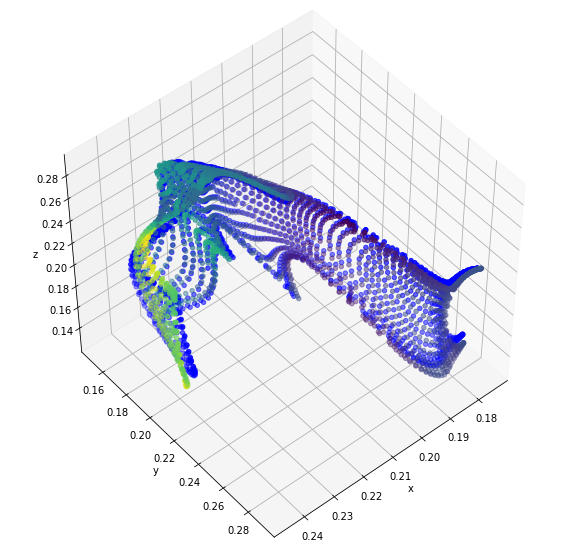

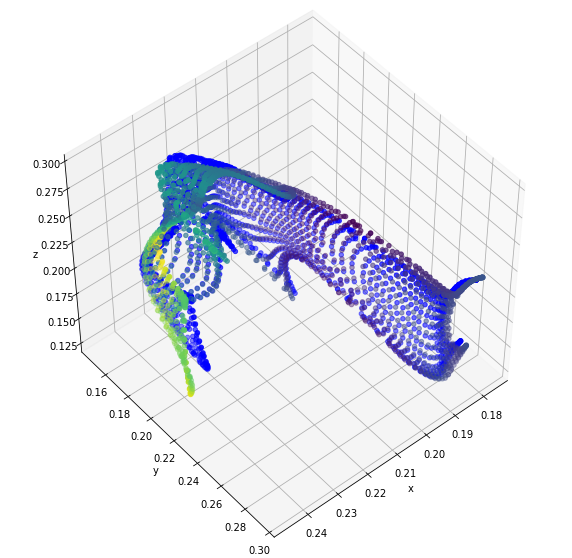

In [25]:
for i in range(st):
    xyz3 = np.dot(DATA[dim3*st+i], np.linalg.pinv(ds))
    xyz_reconstructed3 = np.dot(x_reconstructed3[0, i*3:(i+1)*3], np.linalg.pinv(ds))
    cl = np.linalg.norm(np.abs(xyz - xyz_reconstructed), axis=0)
    cl = (cl-np.amin(cl))/(np.amax(cl)-np.amin(cl))
    fig = plt.figure(figsize=(10, 10))
    c = ['b', 'r']
    m = ['o', 'o']
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(xyz_reconstructed3[0], xyz_reconstructed3[1], xyz_reconstructed3[2], c=cl, marker=m[1])
    ax.scatter(xyz3[0], xyz3[1], xyz3[2], c=c[0], marker=m[0])
    ax.view_init(50, 50)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z') 

In [83]:
import numpy as np
import tensorflow as tf

tf.reset_default_graph()
tf.set_random_seed(2016)
np.random.seed(2016)

from LSTMAutoencoder import *

batch_num = 15
hidden_num = 1000
step_num = st
elem_num = d*3
iteration = 400

p_input = tf.placeholder(tf.float32, shape=(batch_num, step_num, elem_num))
p_inputs = [tf.squeeze(t, [1]) for t in tf.split(p_input, step_num, 1)]

cell = tf.nn.rnn_cell.LSTMCell(hidden_num, use_peepholes=True)
ae = LSTMAutoencoder(hidden_num, p_inputs, cell=cell, decode_without_input=True)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for i in range(iteration):
        r = np.random.randint(dim3, size=batch_num)
        sequences = []
        for j in range(batch_num):
            sequences.append(DATA3[r[j]].reshape(st, 3*d))

        (loss_val, _) = sess.run([ae.loss, ae.train], {p_input: sequences})
        if (i%10 == 0):
            print('Epoch  ' + np.str(i + 1) + '   Loss ' + np.str(loss_val))
            r = np.random.randint(dim3, size=batch_num)
    r = np.random.randint(dim3, size=batch_num)        
    sequences = []
    for j in range(batch_num):
        sequences.append(DATA3[r[j]].reshape(st, 3*d))
    enc_state = sess.run(ae.enc_state, {p_input: sequences})                
    (input_, output_) = sess.run([ae.input_, ae.output_], {p_input: sequences})
    error = np.abs(input_ - output_) 

Epoch  1   Loss 0.08205904
Epoch  11   Loss 0.0087665375
Epoch  21   Loss 0.0033978266
Epoch  31   Loss 0.0009929343
Epoch  41   Loss 0.00021540475
Epoch  51   Loss 7.915211e-05
Epoch  61   Loss 6.122419e-05
Epoch  71   Loss 4.3344957e-05
Epoch  81   Loss 2.8363702e-05
Epoch  91   Loss 1.9716103e-05
Epoch  101   Loss 1.5525222e-05
Epoch  111   Loss 1.3458707e-05
Epoch  121   Loss 1.145948e-05
Epoch  131   Loss 8.385168e-06
Epoch  141   Loss 7.8947905e-06
Epoch  151   Loss 7.956743e-06
Epoch  161   Loss 6.2490562e-06
Epoch  171   Loss 6.3858724e-06
Epoch  181   Loss 5.2986734e-06
Epoch  191   Loss 4.9779637e-06
Epoch  201   Loss 4.4353724e-06
Epoch  211   Loss 3.6317367e-06
Epoch  221   Loss 3.4468228e-06
Epoch  231   Loss 3.958986e-06
Epoch  241   Loss 4.059854e-06
Epoch  251   Loss 3.814305e-06
Epoch  261   Loss 3.6369315e-06
Epoch  271   Loss 3.9792617e-06
Epoch  281   Loss 3.1748389e-06
Epoch  291   Loss 3.0044869e-06
Epoch  301   Loss 2.892718e-06
Epoch  311   Loss 3.3393167e-06
Ep

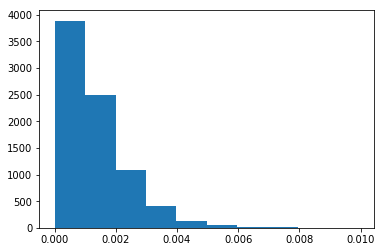

In [84]:
_,_,_ = plt.hist(error.reshape(batch_num*step_num*elem_num), bins=10)

In [85]:
print (len(enc_state), enc_state[0].shape)

2 (15, 1000)
